## Linear Regression Bike Sharing Assignment - BoomBikes Model Selection

### 1. Importing and Understanding Data

In [773]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [774]:
# Importing Housing.csv
bike_sharing = pd.read_csv('day.csv')

In [775]:
# Looking at the first five rows
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 2. Inspect the various aspects of the bike_sharing dataframe

In [776]:
#shape of the bike_sharing
bike_sharing.shape

(730, 16)

In [777]:
# check column information to understand null values and data types
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [778]:
# Describe bike_sharing numerical columns
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### 3. Data Cleanup

In [779]:
# 1. Checking the null values

bike_sharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [780]:
# Dropping unnecessary columns
#1. instant is only an index column and won't be helpful in the analysis
#2. The month and year of dteday is present as yr, mnth hence dtday won't be required
bike_sharing.drop(['instant','dteday'],axis=1,inplace=True)
#3. We can remove casual, registered column because both are collinear with count as they bith are distribution and derive count , count = casual + registered
bike_sharing.drop(['casual','registered'],axis=1,inplace=True)


In [781]:
# Renaming the column names to make it more readable
bike_sharing.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)


In [782]:
# Fixing the categorical columns through mapping - season, month, weekday, weathersit
bike_sharing.season = bike_sharing.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_sharing.month = bike_sharing.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike_sharing.weekday = bike_sharing.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike_sharing.weathersit = bike_sharing.weathersit.map({1:'clear',2:'misty',3:'light_snowrain',4:'heavy_snowrain'})


In [783]:
#Check the first five rows to check the new column names with mapped categorical data
bike_sharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [784]:
# check the column info of the bike_sharing to check the datatype and number of values
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### 4. Visualizing the DataSet


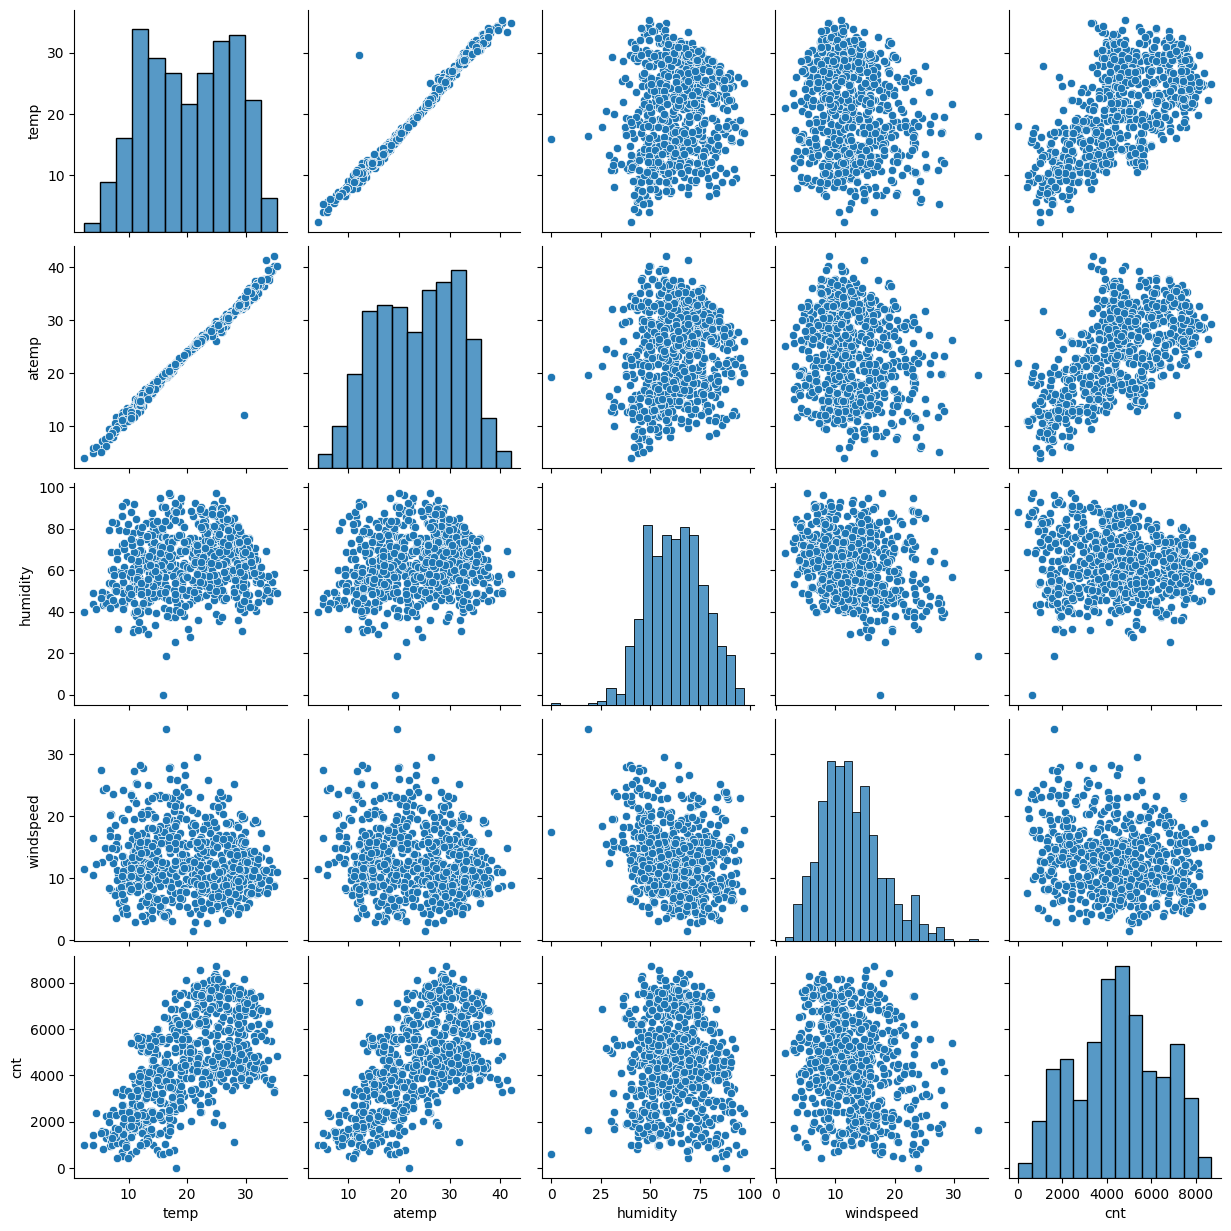

In [785]:
#creating list of numerical column names and categorical column names for using them while plotting the graph
num_cols=['temp','atemp','humidity','windspeed','cnt']
cat_cols = ['season', 'month', 'weathersit', 'weekday', 'holiday', 'workingday', 'year']

sns.pairplot(bike_sharing[num_cols])
plt.show()

<Axes: >

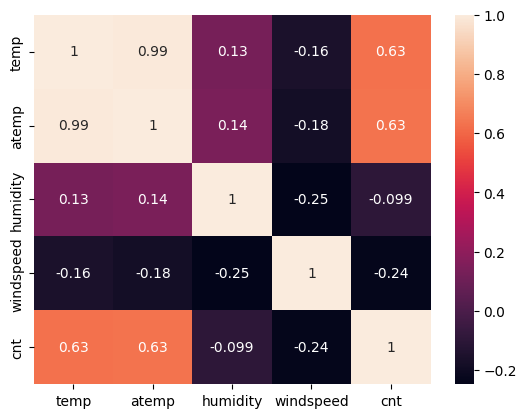

In [786]:
# heatmap
sns.heatmap(bike_sharing[num_cols].corr(), annot = True, )

## From above pair plot and heatmap we can conclude that,
 1. There is a linear relationship between temp column and count column hence MLR Model can be feasible.
 2. There is a linear relation between temp and a temp column. One column can be dropped based on VIF and p-value

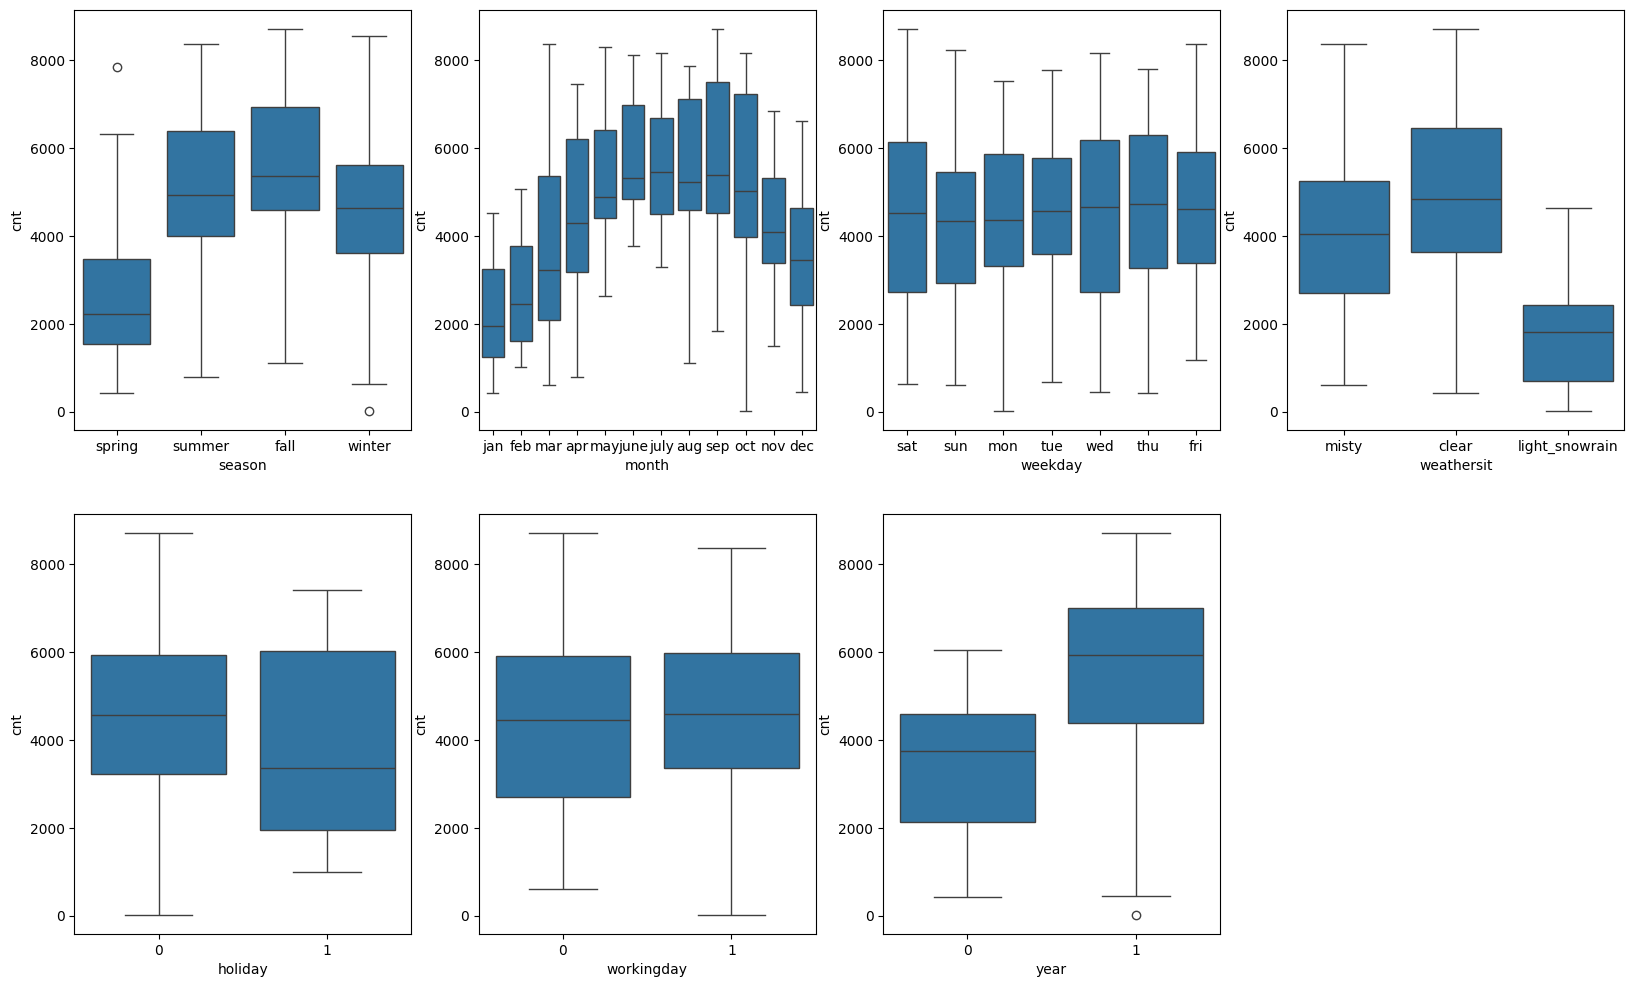

In [787]:
# Visualizing the categorical variables using boxplot

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = bike_sharing)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = bike_sharing)
plt.show()

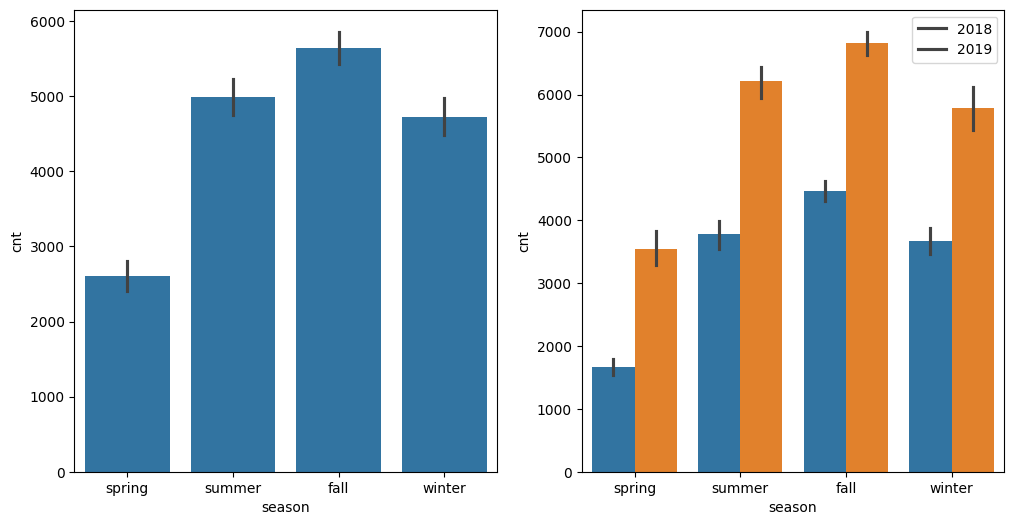

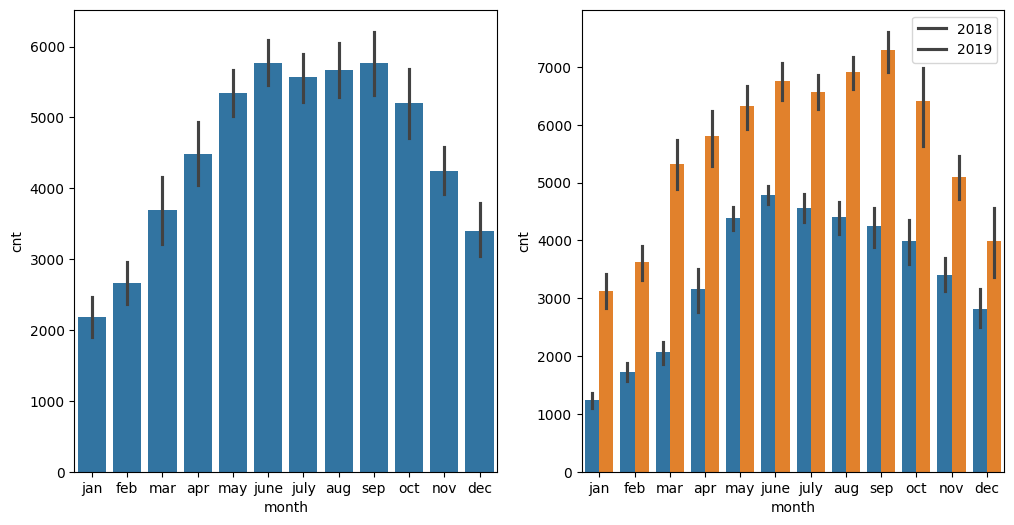

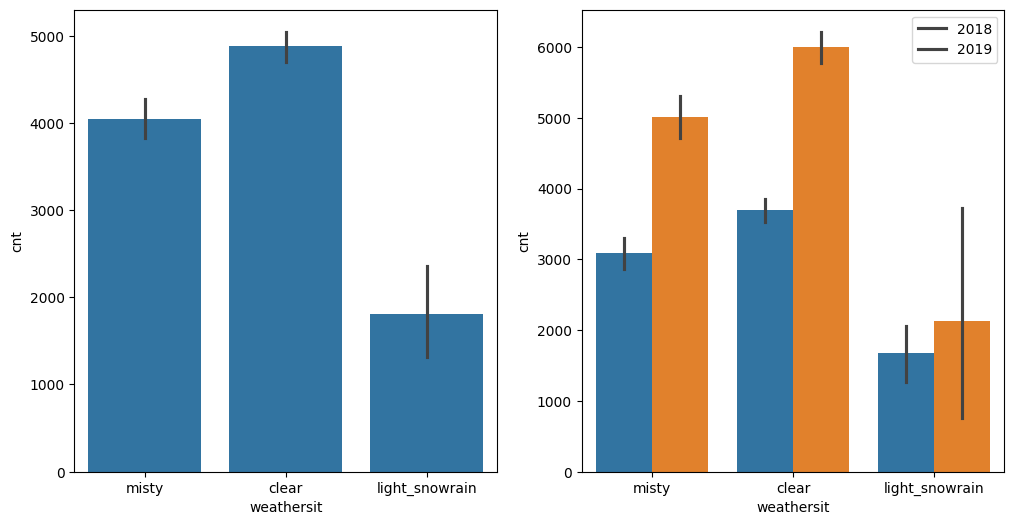

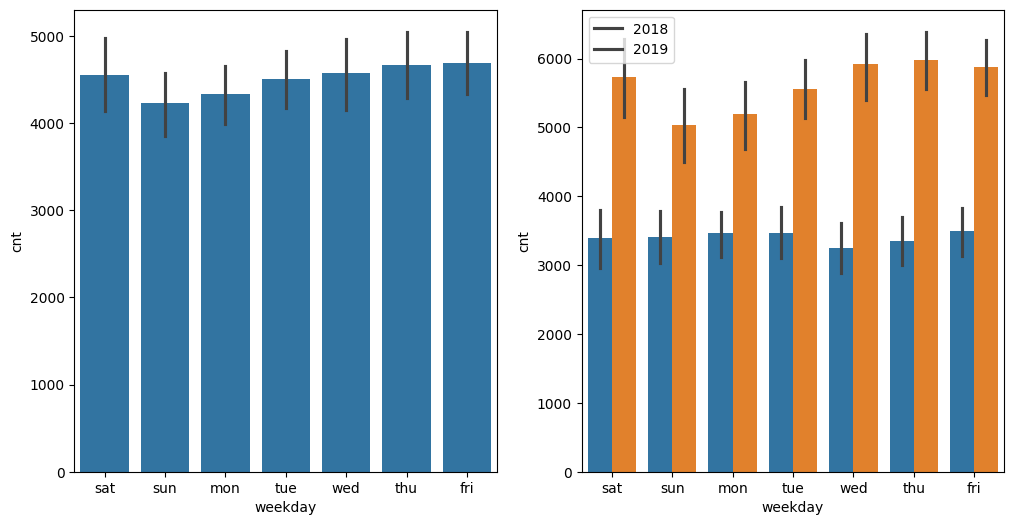

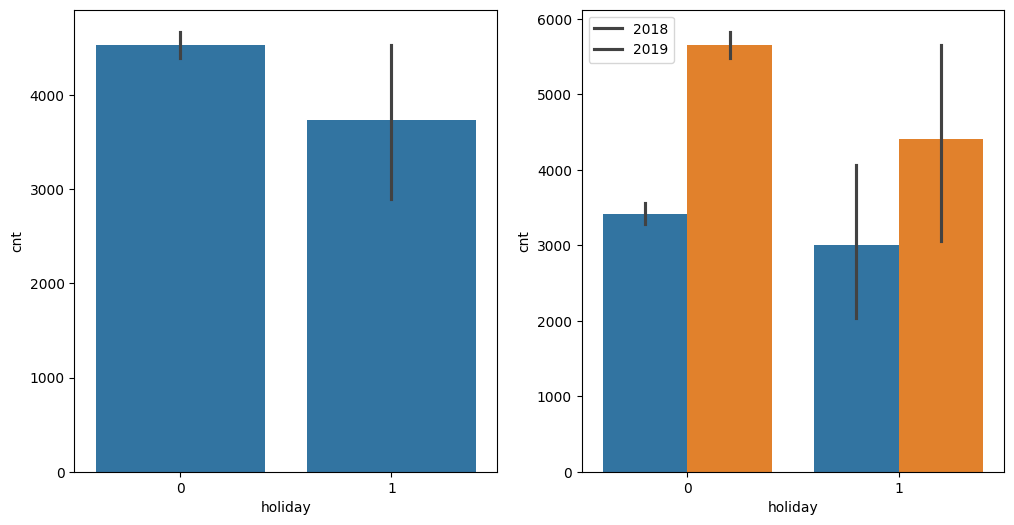

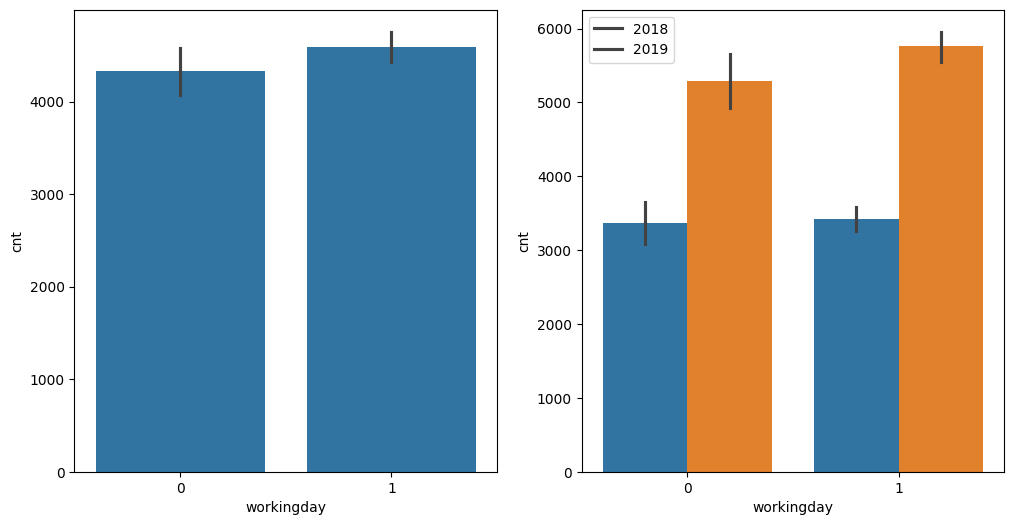

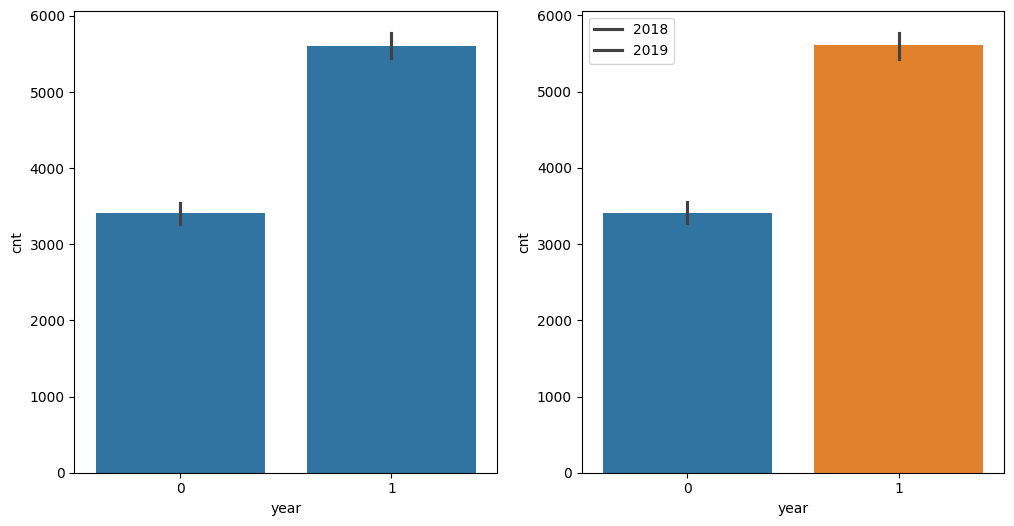

In [788]:
# Boxplot for categorical column
def bar_plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='cnt',data=bike_sharing)
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='cnt',data=bike_sharing, hue='year')
    plt.legend(labels=['2018', '2019'])
    plt.show()

for cat_col in cat_cols:
  bar_plot_cat_columns(cat_col)

## From above box plot we can understand that,
1. The major number of booking is in fall season and least booking in spring and the number of booking is increasing year by year
2. The booking peaks in month of june, july, aug, sept
3. The clear weather attracts more booking, booking is increasing year by year
4. Most number of bookings are made on Wed, Thu, Fri, Sat
5. Booking seems to be more in holidays
6. booking seems to be equal for working day and non-work day but there is a slight increase on non-workday.


### 5. Data Preparation
  1. Encoding - Convert Categorical into Dummy vars
  2. Splitting into train and test
  3. Rescaling

In [789]:
bike_sharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [790]:
# Create dummy variables for categorical columns
seasons_df=pd.get_dummies(bike_sharing.season,drop_first=True, dtype=int)
months_df=pd.get_dummies(bike_sharing.month,drop_first=True, dtype=int)
weekdays_df=pd.get_dummies(bike_sharing.weekday,drop_first=True, dtype=int)
weathersit_df=pd.get_dummies(bike_sharing.weathersit,drop_first=True, dtype=int)
seasons_df

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [791]:
#join the dummy dataframe into original dataframe so that they can be used in our analysis
bike_sharing_new = pd.concat([bike_sharing,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)
bike_sharing_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [792]:
#drop the categorical original column because we cannot fit those in the mode
bike_sharing_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
#We can remove atemp, its highly correlated with temp
bike_sharing_new.drop(['atemp'],axis=1,inplace=True)

In [793]:
bike_sharing_new.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [794]:
bike_sharing_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   humidity        730 non-null    float64
 5   windspeed       730 non-null    float64
 6   cnt             730 non-null    int64  
 7   aug             730 non-null    int64  
 8   dec             730 non-null    int64  
 9   feb             730 non-null    int64  
 10  jan             730 non-null    int64  
 11  july            730 non-null    int64  
 12  june            730 non-null    int64  
 13  mar             730 non-null    int64  
 14  may             730 non-null    int64  
 15  nov             730 non-null    int64  
 16  oct             730 non-null    int64  
 17  sep             730 non-null    int

## Splitting the Data into Training and Testing Sets

In [795]:
# Split Train and Test
df_train, df_test = train_test_split(bike_sharing_new, train_size=0.7, test_size = 0.3,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


In [796]:
#Verifying head of data before rescaling
df_train.head()


,year,holiday,workingday,temp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,48.3333,23.500518,1796,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [797]:
# Rescaling
# Using MinMaxScaler to perform re-scaling
# Only numerical columns will be used in re-scaling and re-scaling of binary columns must be avoided
# Instantiating the object
scaler = MinMaxScaler()

# Fit_Transform on data
num_vars = ['temp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [798]:
# Verifying head after re-scaling
df_train.head()


,year,holiday,workingday,temp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [799]:
df_train.describe()


,year,holiday,workingday,temp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


### 6. Training the Model

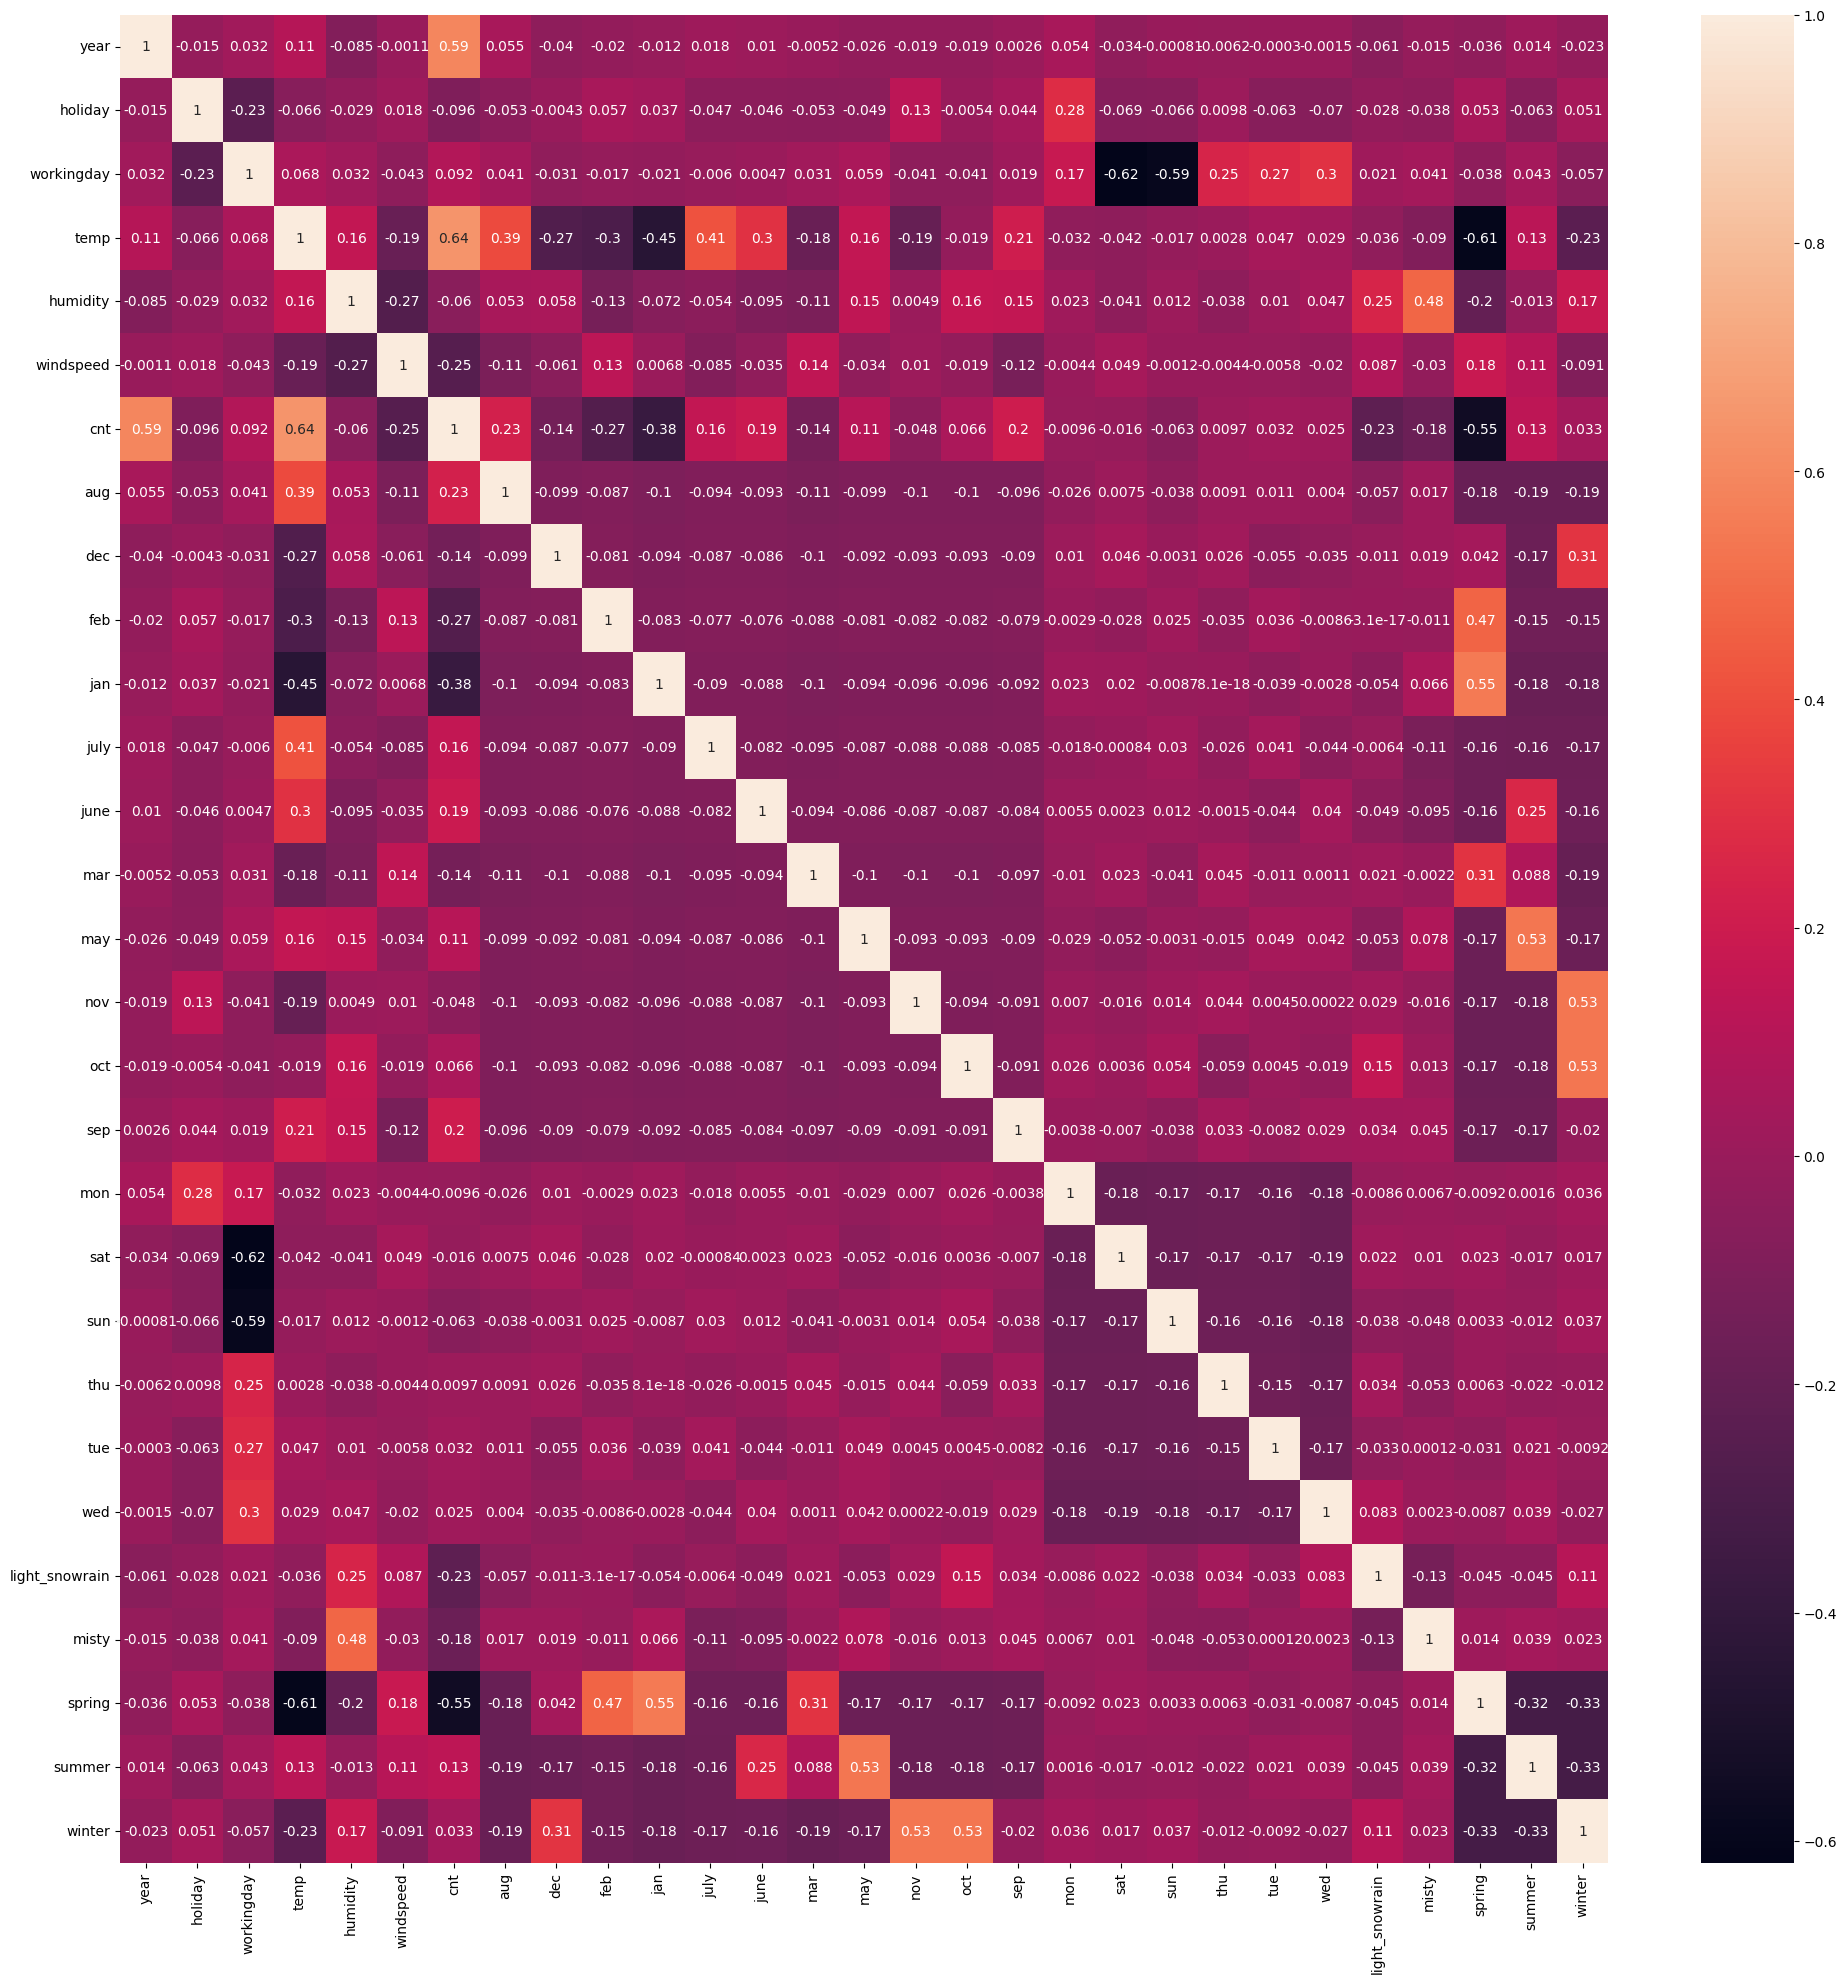

In [800]:
# Drawing a heatmap to check the correlation between,
# 1. Correlation between Predictor vs response column
# 2. correlation within Predictor Variables - Multicollinearity
plt.figure(figsize=(24,24))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

## Year and temp column is correlated with cnt column
## Misty and humidity show correlation
## Spring season with Jan and Feb month,
## Summer season with may, june month
## Winter season with oct and nov, dec month


In [801]:
# Split X and y from training data
y_train = df_train.pop('cnt')
X_train = df_train

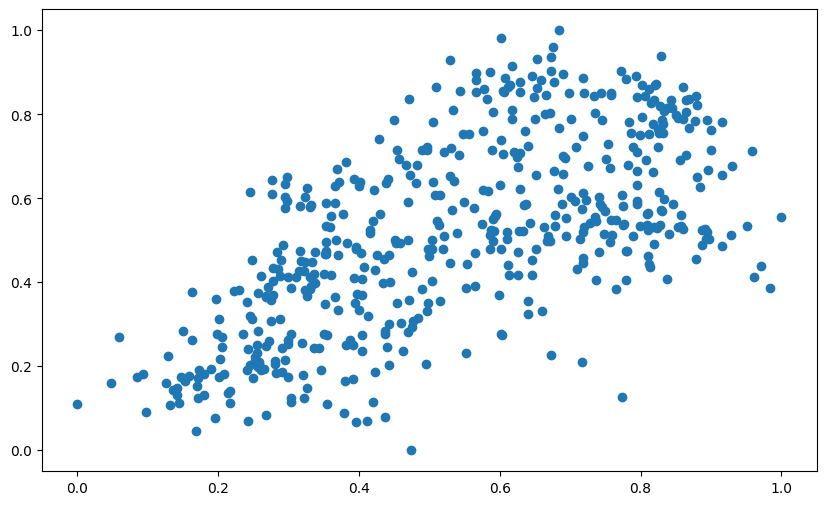

In [802]:
#Visualizing the correlation between temp and cnt
plt.figure(figsize=(10,6))
plt.scatter(x= X_train['temp'], y=y_train)
plt.show()

In [803]:
# Above visual confirms the linear relationship between temp and count

# importing RFE and LinearRegression libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [804]:
# Using Recursive feature elimination - RFE to eliminate the non-significant columns
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [805]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 5),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 13),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 10),
 ('tue', False, 9),
 ('wed', False, 11),
 ('light_snowrain', True, 1),
 ('misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 4),
 ('winter', True, 1)]

In [806]:
# selected variable via RFE in col list

col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'sun', 'light_snowrain', 'misty', 'spring',
       'winter'],
      dtype='object')

In [807]:
# rejected columns
X_train.columns[~rfe.support_]


Index(['aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'mon', 'thu',
       'tue', 'wed', 'summer'],
      dtype='object')

In [808]:
# function to calculate VIF
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### 6. Building Model using statsmodel, for the detailed statistics

In [809]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.head()

,year,holiday,workingday,temp,humidity,windspeed,jan,july,sep,sat,sun,light_snowrain,misty,spring,winter
653,1,0,1,0.509887,0.575354,0.300794,0,0,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,1,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,1,0,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,1,0,0,1,0,0


In [810]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,41.60
9,sat,10.14
10,sun,9.82
3,temp,3.19
13,spring,2.72
1,holiday,2.58
4,humidity,1.90
14,winter,1.81
12,misty,1.57
6,jan,1.55


In [811]:
# The VIF of workingday is very high but it should not be dropped before checking the model summary and p value
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          4.03e-190
Time:                        13:47:10   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2503      0.025      9.

In [812]:
# Lets drop holiday as its p value is very high - 77%
X_train_new = X_train_rfe.drop(['holiday'], axis = 1)

# Recalculate VIF
calculateVIF(X_train_new)


,Features,VIF
3,humidity,29.73
2,temp,18.10
1,workingday,17.04
8,sat,4.60
4,windspeed,4.55
9,sun,4.47
12,spring,3.11
11,misty,2.28
13,winter,2.18
0,year,2.09


In [813]:
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          4.03e-190
Time:                        13:47:10   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2443      0.040      6.

In [814]:
# Lets drop humidity because it has high VIF and other features p-value are well within limit - 5%
X_train_new = X_train_new.drop(['humidity'], axis = 1)

# Recalculate VIF
calculateVIF(X_train_new)


,Features,VIF
1,workingday,13.48
2,temp,12.76
3,windspeed,4.51
7,sat,3.85
8,sun,3.60
11,spring,2.85
0,year,2.07
12,winter,1.79
4,jan,1.65
10,misty,1.58


In [815]:
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.3
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          3.12e-188
Time:                        13:47:10   Log-Likelihood:                 506.90
No. Observations:                 510   AIC:                            -985.8
Df Residuals:                     496   BIC:                            -926.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1686      0.035      4.

In [816]:
# Lets drop workingday as its VIF is high
X_train_new = X_train_new.drop(['workingday'], axis = 1)

# Recalculate VIF
calculateVIF(X_train_new)


,Features,VIF
1,temp,4.75
2,windspeed,4.04
10,spring,2.26
0,year,2.06
3,jan,1.60
9,misty,1.53
11,winter,1.41
4,july,1.36
6,sat,1.22
5,sep,1.20


In [817]:
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.5
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          4.99e-186
Time:                        13:47:10   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -971.7
Df Residuals:                     497   BIC:                            -916.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2691      0.025     10.

In [818]:
# Lets drop sat as its p-value is 17%
X_train_new = X_train_new.drop(['sat'], axis = 1)

# Recalculate VIF
calculateVIF(X_train_new)


,Features,VIF
1,temp,4.69
2,windspeed,4.01
9,spring,2.25
0,year,2.06
3,jan,1.60
8,misty,1.53
10,winter,1.40
4,july,1.36
5,sep,1.20
6,sun,1.17


In [819]:
X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     229.1
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          8.08e-187
Time:                        13:47:10   Log-Likelihood:                 497.93
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     498   BIC:                            -921.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2719      0.025     11.

## We can consider the above model that is having Adj. R-squared = 83.1% and VIF below 5%

In [820]:
lr_5.params


const             0.271875
year              0.235211
temp              0.432172
windspeed        -0.150120
jan              -0.044495
july             -0.065951
sep               0.053563
sun              -0.044848
light_snowrain   -0.288184
misty            -0.080136
spring           -0.103373
winter            0.041960
dtype: float64

### 7. Residual Analysis

In [821]:
X_train_lm_5.head()

,const,year,temp,windspeed,jan,july,sep,sun,light_snowrain,misty,spring,winter
653,1.0,1,0.509887,0.300794,0,0,0,0,0,0,0,1
576,1.0,1,0.815169,0.264686,0,1,0,0,0,0,0,0
426,1.0,1,0.442393,0.255342,0,0,0,0,0,1,1,0
728,1.0,1,0.245101,0.663106,0,0,0,1,0,0,1,0
482,1.0,1,0.395666,0.188475,0,0,0,0,0,1,0,0


In [822]:
y_train_pred = lr_5.predict(X_train_lm_5)

## Normality of Error
The errors are showing normal distribution where the data is accumulated towards the center .i.e 0

Text(0.5, 0, 'Errors')

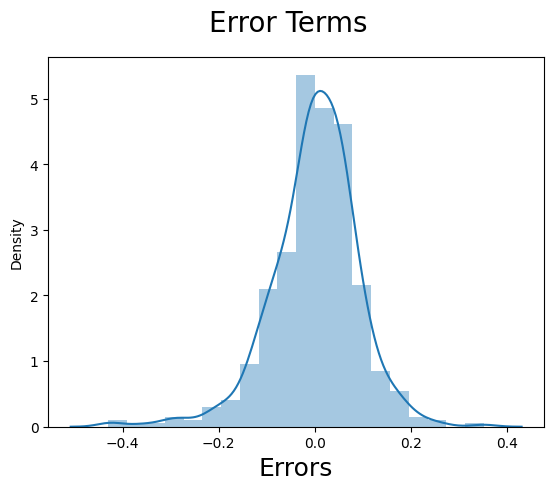

In [823]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

In [824]:
calculateVIF(X_train_new)

,Features,VIF
1,temp,4.69
2,windspeed,4.01
9,spring,2.25
0,year,2.06
3,jan,1.60
8,misty,1.53
10,winter,1.40
4,july,1.36
5,sep,1.20
6,sun,1.17


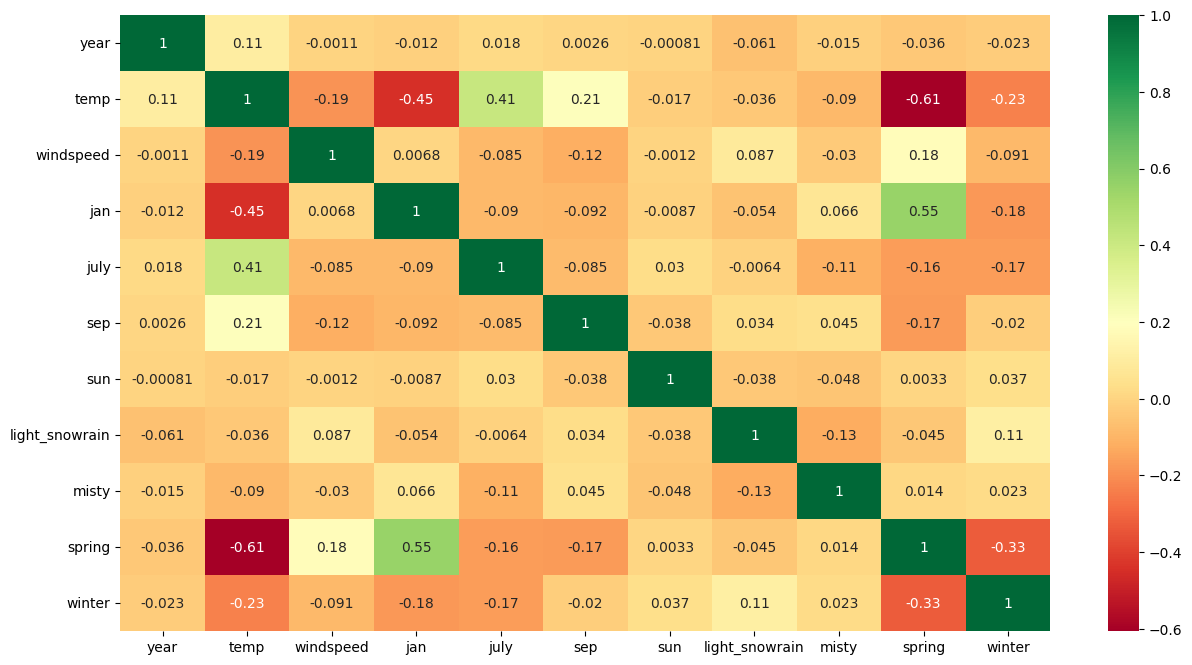

In [825]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

In [826]:
# No Multicollinearity found between the predicator variables
# VIF within limits of 5%

## Linearity

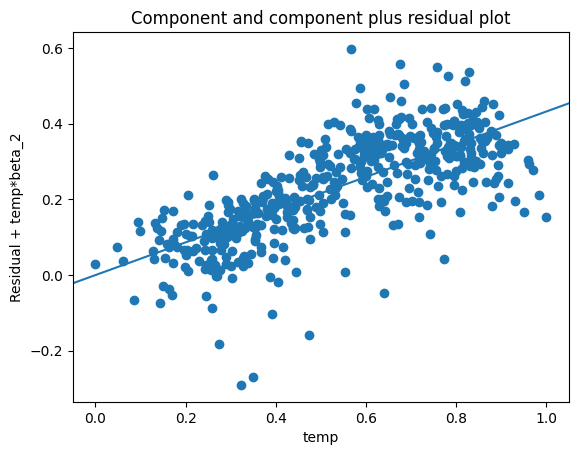

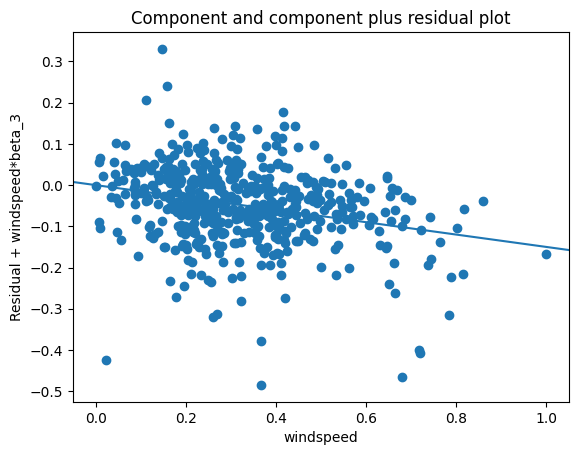

In [827]:
# Linear relationship validation using CCPR plot

sm.graphics.plot_ccpr(lr_5, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'windspeed')
plt.show()

## Homoscedasticity


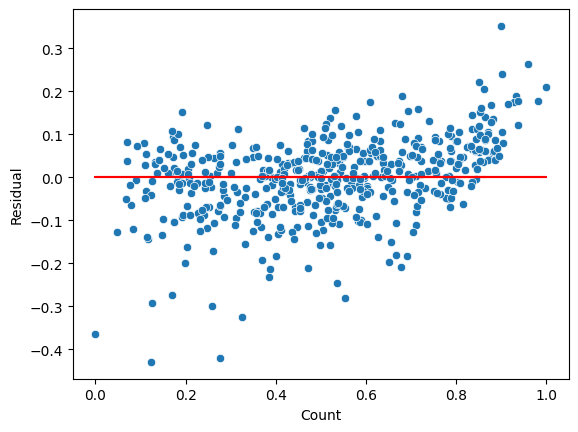

In [828]:
y_train_pred = lr_5.predict(X_train_lm_5)
residual = y_train - y_train_pred
sns.scatterplot(x= y_train,y = residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

### Step 8: Making Predictions Using the Final Model


In [829]:
df_test.columns

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'cnt',
       'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct',
       'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'light_snowrain',
       'misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [830]:
# Re-scale and Transform the numerical columns using the fit obtained

num_vars = ['temp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [831]:
df_test.describe()


,year,holiday,workingday,temp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.059361,0.086758,0.100457,...,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635,0.255708,0.264840,0.232877
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.236840,0.282125,0.301297,...,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [832]:
y_test = df_test.pop('cnt')
X_test = df_test

In [833]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)

In [834]:
y_pred = lr_5.predict(X_test_lm_5)


In [835]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.805

### Step 8: Model Evaluation



Text(0, 0.5, 'y_pred')

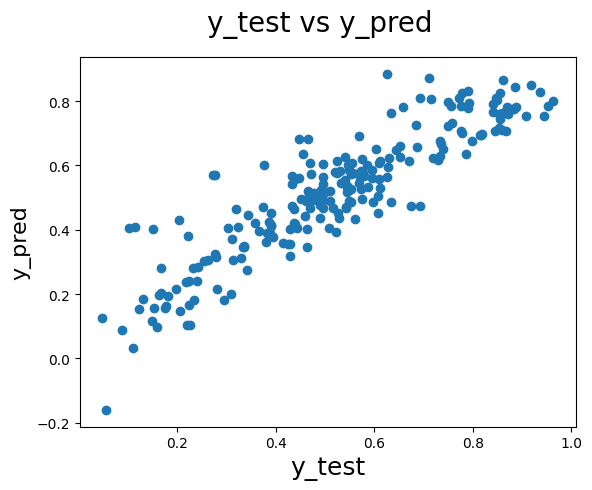

In [836]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

In [837]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7947


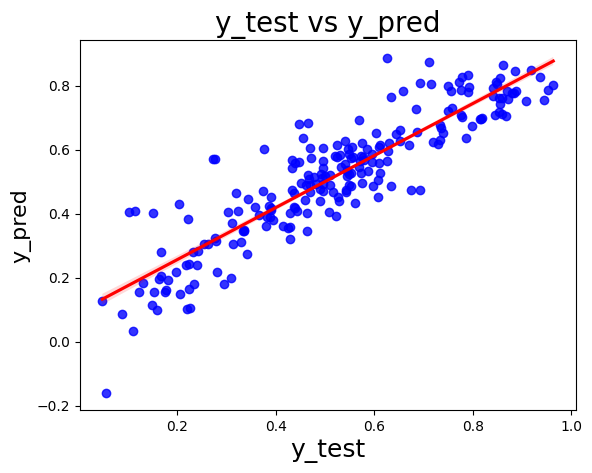

In [838]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.835
- Test dataset R^2           : 0.805
- Train dataset Adjusted R^2 : 0.831    
- Test dataset Adjusted R^2  : 0.7947
Demand of bikes depend on year, workingday, temp, windspeed, sep, sat, light_snowrain, Misty, spring, summer and winter.